<a href="https://colab.research.google.com/github/user20and21/Account/blob/master/3_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sklearn
import sklearn.datasets as datasets
data = datasets.load_digits()
type(data)

sklearn.utils._bunch.Bunch

In [4]:
data.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
len(data.images)

1797

In [6]:
type(data.images)

numpy.ndarray

In [7]:
data.images[0].shape

(8, 8)

In [ ]:
data.images

In [ ]:
data.target[0]

In [ ]:
data.images[0].dtype

In [11]:
import numpy as np
np.max(data.images)

16.0

In [ ]:
#How do I convert this to 255 values?
(data.images[0]/16 * 255).astype(np.uint8)

In [21]:
from PIL import Image

Image.fromarray((data.images[0]/16 * 255).astype(np.uint8))

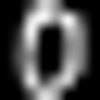

In [22]:
Image.fromarray((data.images[0]/16 * 255).astype(np.uint8)).resize((100, 100))

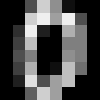

In [26]:
Image.fromarray((data.images[0]/16 * 255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)

8


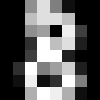

In [29]:
i = 8
print(data.target[i])
Image.fromarray((data.images[i]/16 * 255).astype(np.uint8)).resize((100, 100), resample = Image.NEAREST)